#**Predictive Maintenance for Oil & Gas Pump Operation**
**Accenture 2C**

##**Objective**
We plan to examine pump operational data, prepare it for machine learning modeling, and uncover relationships between features and pump status (running vs. faulty). This report outlines dataset characteristics, preprocessing steps, correlation patterns, temporal behavior, and actionable insights to guide the next phase of predictive modeling.

## Load the data


In [ ]:
import pandas as pd

import io
df = pd.read_csv('combined_pump_timeseries.csv')
df.columns

Index(['timestamp', 'pump_throughput_m3ph', 'operating_pressure_bar',
       'vibration_mm_s', 'bearing_temp_C', 'status', 'pump_number'],
      dtype='object')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined_pump_timeseries.csv to combined_pump_timeseries (2).csv


In [ ]:
df.head()

,timestamp,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,status,pump_number
0,2025-04-15 20:14:00.388595,101.948189,9.911733,1.151807,63.317134,RUNNING,1
1,2025-04-15 20:24:00.388595,97.350999,10.015090,1.222389,67.622323,RUNNING,1
2,2025-04-15 20:34:00.388595,98.642862,9.890661,1.284898,67.834281,RUNNING,1
3,2025-04-15 20:44:00.388595,101.125591,10.136244,1.010065,64.876550,RUNNING,1
4,2025-04-15 20:54:00.388595,102.167705,10.048706,0.981551,69.590331,RUNNING,1


In [ ]:
df.shape

(720050, 7)

**Reasoning**:
Import the pandas library, load the data into a pandas DataFrame, and display the first few rows to verify.



##**Extract the Data**
### Identify variable types





**Reasoning**:
Iterate through each column in the DataFrame, determine its data type, and append the column name to the appropriate list based on its data type.



In [ ]:
numerical_cols = ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C', 'pump_number']
categorical_cols = ['timestamp']


print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C', 'pump_number']
Categorical Columns: ['timestamp']


In [ ]:
df['status'].unique()

array(['RUNNING', 'DOWN'], dtype=object)

The dataset consists of numerical and categorical variables capturing pump performance and operating conditions.
* Numerical features:
* vibration_mm_s
* bearing_temp_C
* pump_throughput_m3ph
* Operating_pressure_bar

Categorical features:
* timestamp (later decomposed into date, hour, minute, second)
* pump_status (binary encoded: running/faulty)

Target variable:
* status, representing the operational condition of the pump.

---



**Below we are understanding the time series variable**

In [ ]:
df['timestamp'].value_counts()

,count
timestamp,
2025-07-24 20:14:00.388595,50
2025-07-24 17:34:00.388595,50
2025-07-24 17:24:00.388595,50
2025-07-24 17:14:00.388595,50
2025-07-24 17:04:00.388595,50
...,...
2025-04-15 21:04:00.388595,50
2025-04-15 20:54:00.388595,50
2025-04-15 20:44:00.388595,50


In [ ]:
len(df['timestamp'].unique().tolist())

14401

Get the Features and the label

change the categorical label column to 0 or 1

In [ ]:
df['status'] = df['status'].apply(lambda x: 1 if x == 'DOWN' else 0)
#^^lambda creates samll anonymous functions
df['status'].unique()

array([0, 1])

In [ ]:
df['status'].value_counts()

,count
status,
0,671600
1,48450


##**Clean the data/Feature Engineering**

### Handle categorical variables


In [ ]:
X2 = df.drop(columns=['status', 'timestamp'])

**Reasoning**:
Standardize the categorical variables as per instructions.
- Time series data: Divide into corresponding numerical conversions (hours, minutes, seconds)
- Status: Changed to binary



### Handle numerical variables
Normalize numerical features using a suitable scaling method (e.g., StandardScaler or MinMaxScaler).


**Reasoning**:
Normalize the numerical features using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numerical_cols])
df_numerical_scaled = pd.DataFrame(scaler.transform(df[numerical_cols]), columns=numerical_cols)
display(df_numerical_scaled.head())

,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number
0,0.348360,0.313934,-0.195140,-0.048179,-1.697749
1,0.166192,0.355325,-0.046045,0.321509,-1.697749
2,0.217384,0.305496,0.085996,0.339710,-1.697749
3,0.315764,0.403843,-0.494547,0.085729,-1.697749
4,0.357059,0.368787,-0.554780,0.490503,-1.697749


## Combine processed data

### Subtask:
Combine the standardized categorical and normalized numerical data into a single DataFrame.


**Reasoning**:
Concatenate the one-hot encoded categorical features and the scaled numerical features into a single DataFrame.



In [ ]:
df_processed = df.drop(columns=numerical_cols).copy()
df_processed = pd.concat([df_processed, df_numerical_scaled], axis=1)
display(df_processed.head())

,timestamp,status,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number
0,2025-04-15 20:14:00.388595,0,0.348360,0.313934,-0.195140,-0.048179,-1.697749
1,2025-04-15 20:24:00.388595,0,0.166192,0.355325,-0.046045,0.321509,-1.697749
2,2025-04-15 20:34:00.388595,0,0.217384,0.305496,0.085996,0.339710,-1.697749
3,2025-04-15 20:44:00.388595,0,0.315764,0.403843,-0.494547,0.085729,-1.697749
4,2025-04-15 20:54:00.388595,0,0.357059,0.368787,-0.554780,0.490503,-1.697749


Group by the timestamp

In [ ]:
from datetime import time
timestamp_date = []
timestamp_time = []
for row in df_processed['timestamp']:
  timestamp_date.append(row[0:10])
  timestamp_time.append(row[11:19])

df_processed['timestamp_date'] = timestamp_date
df_processed['timestamp_time'] = timestamp_time
df_processed.head()

# timestamp_groups = set(timestamp_groups)
# timestamp_groups


,timestamp,status,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number,timestamp_date,timestamp_time
0,2025-04-15 20:14:00.388595,0,0.348360,0.313934,-0.195140,-0.048179,-1.697749,2025-04-15,20:14:00
1,2025-04-15 20:24:00.388595,0,0.166192,0.355325,-0.046045,0.321509,-1.697749,2025-04-15,20:24:00
2,2025-04-15 20:34:00.388595,0,0.217384,0.305496,0.085996,0.339710,-1.697749,2025-04-15,20:34:00
3,2025-04-15 20:44:00.388595,0,0.315764,0.403843,-0.494547,0.085729,-1.697749,2025-04-15,20:44:00
4,2025-04-15 20:54:00.388595,0,0.357059,0.368787,-0.554780,0.490503,-1.697749,2025-04-15,20:54:00


In [ ]:
df_processed.drop(columns="timestamp", inplace=True)
df_processed.head()

,status,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number,timestamp_date,timestamp_time
0,0,0.348360,0.313934,-0.195140,-0.048179,-1.697749,2025-04-15,20:14:00
1,0,0.166192,0.355325,-0.046045,0.321509,-1.697749,2025-04-15,20:24:00
2,0,0.217384,0.305496,0.085996,0.339710,-1.697749,2025-04-15,20:34:00
3,0,0.315764,0.403843,-0.494547,0.085729,-1.697749,2025-04-15,20:44:00
4,0,0.357059,0.368787,-0.554780,0.490503,-1.697749,2025-04-15,20:54:00


In [ ]:
features = df.drop('status', axis=1)
label = df['status']

features.head()

,timestamp,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number
0,2025-04-15 20:14:00.388595,101.948189,9.911733,1.151807,63.317134,1
1,2025-04-15 20:24:00.388595,97.350999,10.015090,1.222389,67.622323,1
2,2025-04-15 20:34:00.388595,98.642862,9.890661,1.284898,67.834281,1
3,2025-04-15 20:44:00.388595,101.125591,10.136244,1.010065,64.876550,1
4,2025-04-15 20:54:00.388595,102.167705,10.048706,0.981551,69.590331,1


In [ ]:
df_processed['timestamp_seconds'] = pd.to_timedelta(df_processed['timestamp_time']).dt.total_seconds().astype('int64')
df_processed['timestamp_hour'] = pd.to_datetime(df_processed['timestamp_time']).dt.hour
df_processed['timestamp_minute'] = df_processed['timestamp_seconds']//60
display(df_processed.head())


/tmp/ipython-input-4138981638.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_processed['timestamp_hour'] = pd.to_datetime(df_processed['timestamp_time']).dt.hour


,status,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number,timestamp_date,timestamp_time,timestamp_seconds,timestamp_hour,timestamp_minute
0,0,0.348360,0.313934,-0.195140,-0.048179,-1.697749,2025-04-15,20:14:00,72840,20,1214
1,0,0.166192,0.355325,-0.046045,0.321509,-1.697749,2025-04-15,20:24:00,73440,20,1224
2,0,0.217384,0.305496,0.085996,0.339710,-1.697749,2025-04-15,20:34:00,74040,20,1234
3,0,0.315764,0.403843,-0.494547,0.085729,-1.697749,2025-04-15,20:44:00,74640,20,1244
4,0,0.357059,0.368787,-0.554780,0.490503,-1.697749,2025-04-15,20:54:00,75240,20,1254


##**Data Exploration/Statistical Analysis**
Here, our main concern is understanding the relationship between the features and our label. This can help us determine which features should be considered for the actual model training. There some features that are redundent, like the time, and using all three may very well cause overfitting. Additionally, we will graph the time, as it is categorical, and the

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###**Time Series Analysis**

<Axes: xlabel='timestamp_date', ylabel='status'>

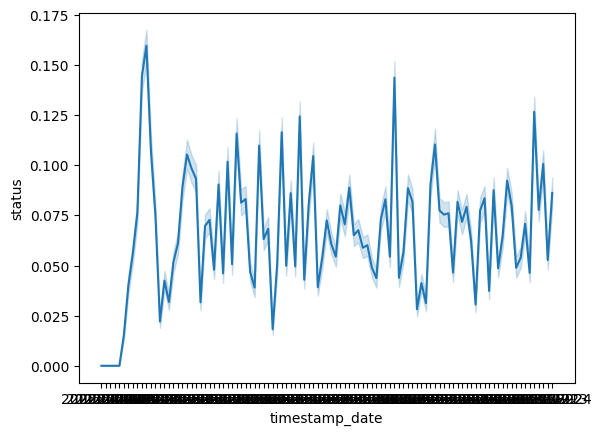

In [ ]:
sns.lineplot(
    data=df_processed,
    y='status',
    x='timestamp_date')

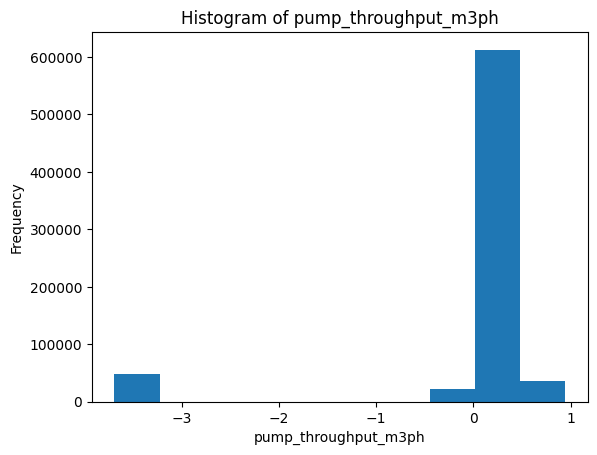

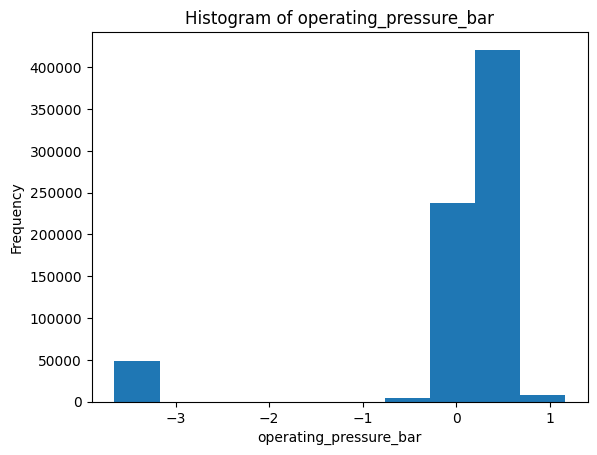

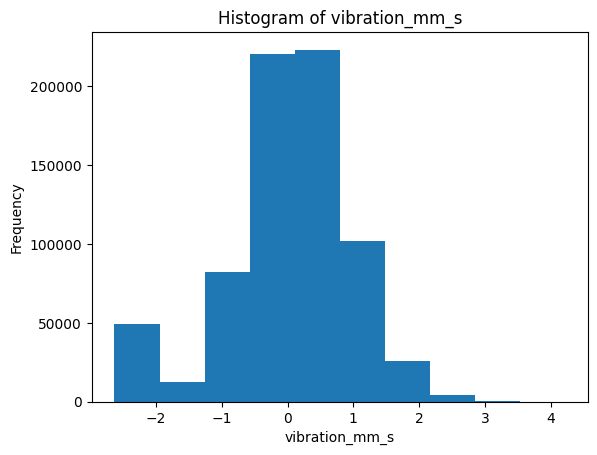

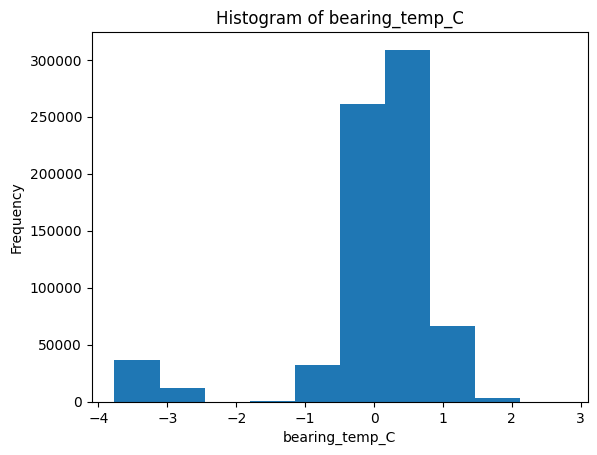

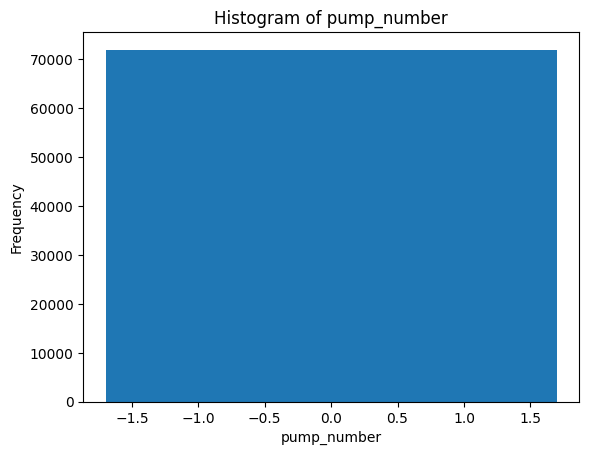

In [ ]:
for col in df_numerical_scaled.columns:
  plt.hist(df_numerical_scaled[col])
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {col}")
  plt.show()

Here, we see some clear outliers in the preassure, temperature, vibration, and pump throughput. The data is about symmetrical, but there are reoccuring outliers that are lower than the median frequencies. These outliers are high in frequency, about 5000 each, so the similar level in frequency may suggest some relationship. Additionally, the frequency is similar to the number of non-functional pumps in the dataset, so that may be another relationship. Ultimately, although these data are definitely far from the norm, they seem to be important for the data relationships, and are high in frequency. Thus, they will be kept. There are also some outliers that are higher than the median frequency, and they are also very small in frequency. Because of the low frequency of these data, these outliers will be winsorized to prevent risks of high variance in the data.

**Questions**:
How should we react to these outliers?
- Winsorization was the approach we took.

In [ ]:
from scipy.stats.mstats import winsorize

cols_to_winsorize = ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C']

for col in cols_to_winsorize:
    df_processed[col] = winsorize(df_processed[col].values, limits=(0, 0.01))

display(df_processed.head())

,status,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,pump_number,timestamp_date,timestamp_time,timestamp_seconds,timestamp_hour,timestamp_minute
0,0,0.348360,0.313934,-0.195140,-0.048179,-1.697749,2025-04-15,20:14:00,72840,20,1214
1,0,0.166192,0.355325,-0.046045,0.321509,-1.697749,2025-04-15,20:24:00,73440,20,1224
2,0,0.217384,0.305496,0.085996,0.339710,-1.697749,2025-04-15,20:34:00,74040,20,1234
3,0,0.315764,0.403843,-0.494547,0.085729,-1.697749,2025-04-15,20:44:00,74640,20,1244
4,0,0.357059,0.368787,-0.554780,0.490503,-1.697749,2025-04-15,20:54:00,75240,20,1254


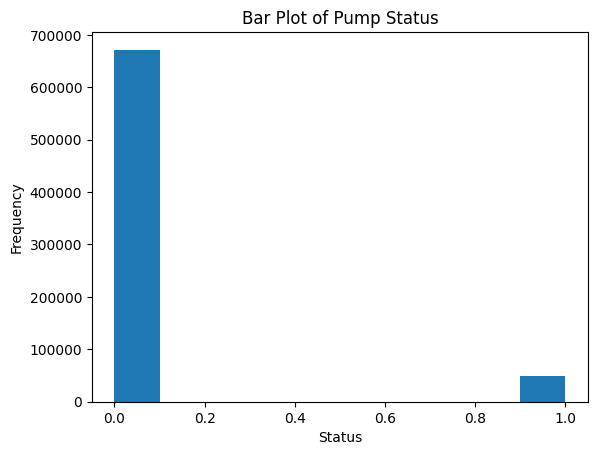

In [ ]:
plt.hist(df_processed['status'])
plt.xlabel('Status')
plt.ylabel("Frequency")
plt.title("Bar Plot of Pump Status")
plt.show()

We see a small quantity of non-functional gas pumps. Only around 8% of the dataset is includes non-functional pumps reaffirming the need for stratification when creating test data.

In hopes of understanding relationships between features and label, as well as analyzing the linearality of the graph to see possible model candididates, I will analyze the correlations.

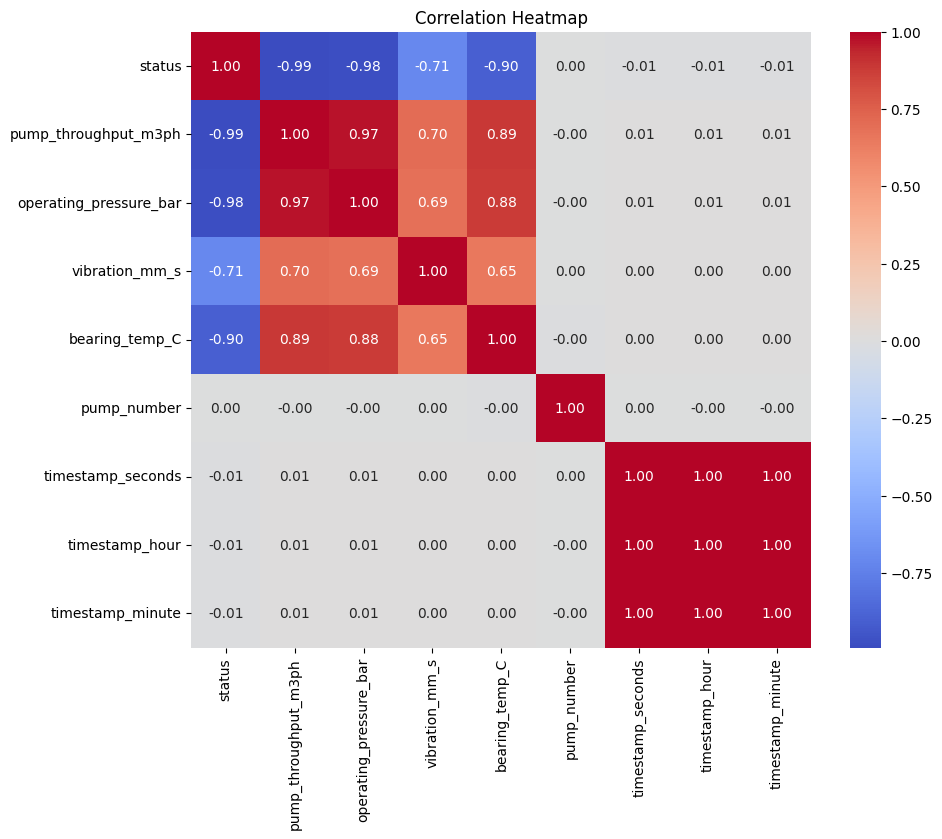

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_processed.drop(columns = ['timestamp_date', 'timestamp_time'],inplace = False).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Summary:

### Key Findings

* The dataset contains both numerical and categorical variables.

* Numerical columns include pump_speed, outlet_pressure, flow_rate, motor_current, motor_voltage, motor_power, and vibration.

* Categorical columns include timestamp and pump_status.

* Categorical variables were successfully standardized using one-hot encoding, creating new columns for each unique category (e.g., timestamp_..., pump_status_...).

* Numerical features were successfully normalized using StandardScaler.

* The standardized categorical and normalized numerical data were combined into a single processed DataFrame.

* Date and time were separated into distinct columns, and time was computed as hours, minutes, and seconds to test suitability for training.

* Correlation analysis showed that timestamp features have little correlation with the label, except for hour, which may be somewhat useful.

* A time-series plot revealed high variance in status values over time.

* Running pumps are overrepresented in the dataset, creating class imbalance.

* There were both outliers less and more than the median, but there were a high frequency of those less than the median, so only those greater than the median were winsorized.

* Thankfully, there were no null or missing data.

### Insights / Next Steps

* Consider excluding time features in modeling, except for hour, which showed the strongest (though still weak) relationship with status.

* Include date as a feature despite low correlation, since the plot suggests some visual relationship with status.

* Apply stratification or resampling to address class imbalance.

* The dataset is now ready for machine learning modeling.

* Due to the dataset’s size, it will be efficient to train models using PyTorch on GPU.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#**MILESTONE 2**

Logistic Regression --> high linear correlations between the data, and it's a lightweight model that doesn't take a lot of computational cost

Removed pump_number to prevent any chances for a data leakage, and time because there is low correlation between the time and feature.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X = df_processed.drop(columns = ["status", 'timestamp_date',"timestamp_seconds", "timestamp_hour", "timestamp_minute", 'pump_number',
                                 'timestamp_time'], inplace = False)
y = df["status"]
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
y_train.value_counts()


,count
status,
0,537280
1,38760


In [ ]:
y_test.value_counts()

,count
status,
0,134320
1,9690


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

,count
status,
0,537280
1,537280


In [ ]:
import torch
import torch.nn as nn

##**Logistic Regression Function**
We are using a single linear layer to represent our Logisitic Regression. We are using sigmoid to convert our outputs into predictions, as the base outputs are probability logits.

In [ ]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, 1)
  def forward(self,x):
    out = self.linear(x)
    out = torch.sigmoid(out)
    return out

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = TensorDataset(torch.tensor(x_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
test_loader = DataLoader(test_data, batch_size=32, shuffle = False)
model = LogisticRegressionModel(X_train.shape[1])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
import torch.optim as optim
def train_logistic_regression(epochs, train_loader,model,criterion=torch.nn.BCELoss(), optimizer=optim.SGD(model.parameters(), lr=0.01)):
  model.train()
  for epoch in range(epochs):
    for batch in train_loader:
      inputs, labels = [x.to(device) for x in batch]
      optimizer.zero_grad()
      outputs = model(inputs)
      outputs = torch.max(outputs, dim=1)[0]

      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


In [ ]:
train_logistic_regression(1,train_loader,model)

Epoch [1/1], Loss: 0.0038


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score
)
import torch

def test_logistic_regression(test_loader, model, device, threshold: float = 0.5):
    """
    Evaluate a trained binary logistic regression model on a DataLoader.

    Args:
        test_loader: DataLoader over (X, y) with y in {0,1}
        model: trained PyTorch model whose forward returns sigmoid probabilities
        device: torch.device("cuda") or torch.device("cpu")
        threshold: decision threshold for positive class (default 0.5)

    Returns:
        metrics (dict): accuracy, precision, recall, f1, roc_auc, pr_auc,
                        confusion_matrix (2x2 list), support (tuple[int,int])
    """
    model.eval()
    y_true_list, y_score_list = [], []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)
            # model forward should output probabilities in [0,1] (sigmoid in model)
            probs = model(xb).squeeze()  # shape: (batch,)
            # Collect CPU copies
            y_true_list.append(yb.detach().float().cpu())
            y_score_list.append(probs.detach().float().cpu())

    # Concatenate
    y_true = torch.cat(y_true_list).numpy()
    y_score = torch.cat(y_score_list).numpy()

    # Threshold to get class predictions
    import numpy as np
    y_pred = (y_score >= threshold).astype(np.int64)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average="binary", zero_division=0
    )
    # Handle edge cases where AUC can't be computed (all one class)
    try:
        roc_auc = roc_auc_score(y_true, y_score)
    except ValueError:
        roc_auc = float("nan")
    try:
        pr_auc = average_precision_score(y_true, y_score)
    except ValueError:
        pr_auc = float("nan")

    cm = confusion_matrix(y_true, y_pred).tolist()

    print("=== Logistic Regression (PyTorch) — Test Metrics ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {roc_auc:.4f}")
    print(f"PR  AUC  : {pr_auc:.4f}\n")
    print("Confusion Matrix [[TN, FP], [FN, TP]]:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "confusion_matrix": cm,
        "support": support
    }


In [ ]:
test_logistic_regression(test_loader, model, device)

=== Logistic Regression (PyTorch) — Test Metrics ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC AUC  : 1.0000
PR  AUC  : 1.0000

Confusion Matrix [[TN, FP], [FN, TP]]:
[[134320, 0], [0, 9690]]

Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000    134320
         1.0     1.0000    1.0000    1.0000      9690

    accuracy                         1.0000    144010
   macro avg     1.0000    1.0000    1.0000    144010
weighted avg     1.0000    1.0000    1.0000    144010



{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': np.float64(1.0),
 'pr_auc': np.float64(1.0),
 'confusion_matrix': [[134320, 0], [0, 9690]],
 'support': None}

In [ ]:
cm_lr = np.array([[134320, 0],
                  [0, 9690]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Here, we saw stellar preformances by the Logistic Regression model, despite being such a lightweight model. This is largely due to the large linearity of the data. Additionally, it seems as though the time factor is not a very important feature, as the model is performing very well without it.

###KNearestNeighbors

In [ ]:
from sklearn.neighbors import (
    KNeighborsClassifier)

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(accuracy_score(KNN.predict(x_test), y_test))

1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_knn = KNN.predict(x_test)

print("=== K Nearest Neighbors — Test Metrics ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, digits=4, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

=== K Nearest Neighbors — Test Metrics ===

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    134320
           1     1.0000    1.0000    1.0000      9690

    accuracy                         1.0000    144010
   macro avg     1.0000    1.0000    1.0000    144010
weighted avg     1.0000    1.0000    1.0000    144010


Confusion Matrix:
[[134320      0]
 [     0   9690]]


In [ ]:

cm_knn = np.array([[134320, 0],
                   [0, 9690]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('K-Nearest Neighbors Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###DecisionTreeClassifier

In [ ]:
from sklearn.tree import (DecisionTreeClassifier)

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DTpredictions = DT.predict(x_test)
print("=== Decision Tree — Test Metrics ===")
print("\nClassification Report:")
print(classification_report(y_test, DTpredictions, digits=4, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, DTpredictions))

=== Decision Tree — Test Metrics ===

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    134320
           1     1.0000    1.0000    1.0000      9690

    accuracy                         1.0000    144010
   macro avg     1.0000    1.0000    1.0000    144010
weighted avg     1.0000    1.0000    1.0000    144010


Confusion Matrix:
[[134320      0]
 [     0   9690]]


In [ ]:

cm_dt = np.array([[134320, 0],
                  [0, 9690]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###RandomForestClassifer

In [ ]:
from sklearn.ensemble import (RandomForestClassifier)

In [ ]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
RFpredictions = RFmodel.predict(x_test)
print("=== Random Forest — Test Metrics ===")
print("\nClassification Report:")
print(classification_report(y_test, RFpredictions, digits=4, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, RFpredictions))

=== Random Forest — Test Metrics ===

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    134320
           1     1.0000    1.0000    1.0000      9690

    accuracy                         1.0000    144010
   macro avg     1.0000    1.0000    1.0000    144010
weighted avg     1.0000    1.0000    1.0000    144010


Confusion Matrix:
[[134320      0]
 [     0   9690]]


In [ ]:

cm_rf = np.array([[134320, 0],
                  [0, 9690]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###Feed-Forward Nueral Network

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = torch.sigmoid(out)
        return out

In [ ]:
import torch

def train_feedforward_network(epochs, train_loader, model, criterion, optimizer, device):
  model.train()
  for epoch in range(epochs):
    for i, (inputs, labels) in enumerate(train_loader):
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs.squeeze(), labels)

      loss.backward()
      optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score
)
import torch
import numpy as np

def test_feedforward_network(test_loader, model, device, threshold: float = 0.5):
    """
    Evaluate a trained binary feedforward neural network on a DataLoader.

    Args:
        test_loader: DataLoader over (X, y) with y in {0,1}
        model: trained PyTorch model whose forward returns sigmoid probabilities
        device: torch.device("cuda") or torch.device("cpu")
        threshold: decision threshold for positive class (default 0.5)

    Returns:
        metrics (dict): accuracy, precision, recall, f1, roc_auc, pr_auc,
                        confusion_matrix (2x2 list), support (tuple[int,int])
    """
    model.eval()
    y_true_list, y_score_list = [], []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)

            probs = model(xb).squeeze()

            y_true_list.append(yb.detach().float().cpu())
            y_score_list.append(probs.detach().float().cpu())


    y_true = torch.cat(y_true_list).numpy()
    y_score = torch.cat(y_score_list).numpy()

    y_pred = (y_score >= threshold).astype(np.int64)


    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average="binary", zero_division=0
    )
    try:
        roc_auc = roc_auc_score(y_true, y_score)
    except ValueError:
        roc_auc = float("nan")
    try:
        pr_auc = average_precision_score(y_true, y_score)
    except ValueError:
        pr_auc = float("nan")

    cm = confusion_matrix(y_true, y_pred).tolist()

    print("=== FeedForward Network (PyTorch) — Test Metrics ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {roc_auc:.4f}")
    print(f"PR  AUC  : {pr_auc:.4f}\n")
    print("Confusion Matrix [[TN, FP], [FN, TP]]:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "confusion_matrix": cm,
        "support": support
    }


In [ ]:
input_dim = X_train.shape[1]
hidden_dim = 32
ff_model = FeedForward(input_dim, hidden_dim)
ff_model.to(device)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(ff_model.parameters(), lr=0.001)
epochs = 1

train_feedforward_network(epochs, train_loader, ff_model, criterion, optimizer, device)

Epoch [1/1], Loss: 0.0000


In [ ]:
test_feedforward_network(test_loader, model, device)

=== FeedForward Network (PyTorch) — Test Metrics ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000
ROC AUC  : 1.0000
PR  AUC  : 1.0000

Confusion Matrix [[TN, FP], [FN, TP]]:
[[134320, 0], [0, 9690]]

Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000    134320
         1.0     1.0000    1.0000    1.0000      9690

    accuracy                         1.0000    144010
   macro avg     1.0000    1.0000    1.0000    144010
weighted avg     1.0000    1.0000    1.0000    144010



{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': np.float64(1.0),
 'pr_auc': np.float64(1.0),
 'confusion_matrix': [[134320, 0], [0, 9690]],
 'support': None}

In [ ]:

cm_ffnn = np.array([[134320, 0],
                   [0, 9690]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_ffnn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Feed-Forward Neural Network Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

###LSTMish idk

In [ ]:
X = df_processed.drop(columns = ["status", "timestamp_seconds", "timestamp_hour", "timestamp_minute", 'pump_number'], inplace = False)

X['timestamp_date'] = pd.to_datetime(X['timestamp_date']).astype(int) // 10**9

X['timestamp_time'] = pd.to_timedelta(X['timestamp_time']).dt.total_seconds().astype(int)


X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)
# smote = SMOTE(random_state=42, k_neighbors=5)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.head()

,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,timestamp_date,timestamp_time
655398,0.148999,0.439509,-0.438379,0.299713,1749081600,78240
390082,-3.691427,-3.655338,-2.628154,-2.951982,1745452800,48240
484395,0.304507,0.155064,1.170535,0.457206,1750204800,40440
303730,0.302432,0.266846,0.476360,0.384498,1745452800,80640
159767,0.001919,0.169916,0.089813,0.558349,1745539200,22440


In [ ]:
X_train_np = X_train.values
x_test_np = x_test.values

X_train_lstm = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
x_test_lstm = x_test_np.reshape((x_test_np.shape[0], 1, x_test_np.shape[1]))

train_data = TensorDataset(torch.tensor(X_train_lstm, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = TensorDataset(torch.tensor(x_test_lstm, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("X_train_lstm shape:", X_train_lstm.shape)
print("x_test_lstm shape:", x_test_lstm.shape)

X_train_lstm shape: (576040, 1, 6)
x_test_lstm shape: (144010, 1, 6)


In [ ]:
X_train.head()

,pump_throughput_m3ph,operating_pressure_bar,vibration_mm_s,bearing_temp_C,timestamp_date,timestamp_time
655398,0.148999,0.439509,-0.438379,0.299713,1749081600,78240
390082,-3.691427,-3.655338,-2.628154,-2.951982,1745452800,48240
484395,0.304507,0.155064,1.170535,0.457206,1750204800,40440
303730,0.302432,0.266846,0.476360,0.384498,1745452800,80640
159767,0.001919,0.169916,0.089813,0.558349,1745539200,22440


In [ ]:
X_train_np = X_train.values
x_test_np = x_test.values

X_train_lstm = X_train_np.reshape((X_train_np.shape[0], 1, X_train_np.shape[1]))
x_test_lstm = x_test_np.reshape((x_test_np.shape[0], 1, x_test_np.shape[1]))

train_data = TensorDataset(torch.tensor(X_train_lstm, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = TensorDataset(torch.tensor(x_test_lstm, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("X_train_lstm shape:", X_train_lstm.shape)
print("x_test_lstm shape:", x_test_lstm.shape)

X_train_lstm shape: (576040, 1, 6)
x_test_lstm shape: (144010, 1, 6)


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        # We only need the output from the last time step for classification
        linear_out = self.linear(lstm_out[:, -1, :])
        out = torch.sigmoid(linear_out)
        return out

In [ ]:
def train_lstm_model(epochs, train_loader, model, criterion, optimizer, device):
  model.train()
  for epoch in range(epochs):
    for inputs, labels in train_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs.squeeze(), labels)

      loss.backward()
      optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

In [ ]:
def test_lstm_model(test_loader, model, device, threshold: float = 0.5):
    """
    Evaluate a trained binary LSTM model on a DataLoader.

    Args:
        test_loader: DataLoader over (X, y) with y in {0,1}
        model: trained PyTorch model whose forward returns sigmoid probabilities
        device: torch.device("cuda") or torch.device("cpu")
        threshold: decision threshold for positive class (default 0.5)

    Returns:
        metrics (dict): accuracy, precision, recall, f1, roc_auc, pr_auc,
                        confusion_matrix (2x2 list), support (tuple[int,int])
    """
    model.eval()
    y_true_list, y_score_list = [], []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            yb = yb.to(device)

            probs = model(xb).squeeze()

            y_true_list.append(yb.detach().float().cpu())
            y_score_list.append(probs.detach().float().cpu())


    y_true = torch.cat(y_true_list).numpy()
    y_score = torch.cat(y_score_list).numpy()

    y_pred = (y_score >= threshold).astype(np.int64)


    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average="binary", zero_division=0
    )
    try:
        roc_auc = roc_auc_score(y_true, y_score)
    except ValueError:
        roc_auc = float("nan")
    try:
        pr_auc = average_precision_score(y_true, y_score)
    except ValueError:
        pr_auc = float("nan")

    cm = confusion_matrix(y_true, y_pred).tolist()

    print("=== LSTM Model (PyTorch) — Test Metrics ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {roc_auc:.4f}")
    print(f"PR  AUC  : {pr_auc:.4f}\n")
    print("Confusion Matrix [[TN, FP], [FN, TP]]:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))

    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "confusion_matrix": cm,
        "support": support
    }

In [ ]:
input_size = X_train_lstm.shape[2]
hidden_size = 50
output_size = 1

lstm_model = LSTMModel(input_size, hidden_size, output_size)
lstm_model.to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
epochs = 1

train_lstm_model(epochs, train_loader, lstm_model, criterion, optimizer, device)

Epoch [1/1], Loss: 0.0683


In [ ]:
#GBM
from sklearn import GradientBoostingClassifier

X = df_processed.drop(columns = ["status", "timestamp_seconds", "timestamp_hour", "timestamp_minute", 'pump_number'], inplace = False)
y = l

ImportError: cannot import name 'GradientBoostingClassifier' from 'sklearn' (/usr/local/lib/python3.12/dist-packages/sklearn/__init__.py)

## Hyperparameter Tuning the Logistic Regression